In [1]:
import mne
# Importing numpy 
import numpy as np
# Importing Scipy 
import scipy as sp
# Importing Pandas Library 
import pandas as pd
# import glob function to scrap files path
from glob import glob
# import display() for better visualitions of DataFrames and arrays
from IPython.display import display
# import pyplot for plotting
import matplotlib.pyplot as plt
import math
from skimage.restoration import denoise_wavelet
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import seaborn as sns
import pywt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
import tensorflow as tf

from models.EEGNet import *

from preprocessing import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
raw_data_eyebrows = {
    '1': ['raw_data/eyebrows/eyebrows_1.csv', 'roi_v2/eyebrows/eyebrows_1.csv'],
    '2': ['raw_data/eyebrows/eyebrows_2.csv', 'roi_v2/eyebrows/eyebrows_2.csv'],
    '3': ['raw_data/eyebrows/eyebrows_3.csv', 'roi_v2/eyebrows/eyebrows_3.csv'],
    '4': ['raw_data/eyebrows/eyebrows_4.csv', 'roi_v2/eyebrows/eyebrows_4.csv'],
    '5': ['raw_data/eyebrows/eyebrows_5.csv', 'roi_v2/eyebrows/eyebrows_5.csv'],
    '6': ['raw_data/eyebrows/eyebrows_6.csv', 'roi_v2/eyebrows/eyebrows_6.csv'],
    '7': ['raw_data/eyebrows/eyebrows_7.csv', 'roi_v2/eyebrows/eyebrows_7.csv'],
    '8': ['raw_data/eyebrows/eyebrows_8.csv', 'roi_v2/eyebrows/eyebrows_8.csv'],
    '9': ['raw_data/eyebrows/eyebrows_9.csv', 'roi_v2/eyebrows/eyebrows_9.csv'],
    '10': ['raw_data/eyebrows/eyebrows_10.csv', 'roi_v2/eyebrows/eyebrows_10.csv'],
}
raw_data_left = {
    '1': ['raw_data/left/left_1.csv', 'roi_v2/left/left_1.csv'],
    '2': ['raw_data/left/left_2.csv', 'roi_v2/left/left_2.csv'],
    '3': ['raw_data/left/left_3.csv', 'roi_v2/left/left_3.csv'],
    '4': ['raw_data/left/left_4.csv', 'roi_v2/left/left_4.csv'],
    '5': ['raw_data/left/left_5.csv', 'roi_v2/left/left_5.csv'],
    '6': ['raw_data/left/left_6.csv', 'roi_v2/left/left_6.csv'],
    '7': ['raw_data/left/left_7.csv', 'roi_v2/left/left_7.csv'],
    '8': ['raw_data/left/left_8.csv', 'roi_v2/left/left_8.csv'],
    '9': ['raw_data/left/left_9.csv', 'roi_v2/left/left_9.csv'],
    '10': ['raw_data/left/left_10.csv', 'roi_v2/left/left_10.csv'],
}
raw_data_right = {
    '1': ['raw_data/right/right_1.csv', 'roi_v2/right/right_1.csv'],
    '2': ['raw_data/right/right_2.csv', 'roi_v2/right/right_2.csv'],
    '3': ['raw_data/right/right_3.csv', 'roi_v2/right/right_3.csv'],
    '4': ['raw_data/right/right_4.csv', 'roi_v2/right/right_4.csv'],
    '5': ['raw_data/right/right_5.csv', 'roi_v2/right/right_5.csv'],
    '6': ['raw_data/right/right_6.csv', 'roi_v2/right/right_6.csv'],
    '7': ['raw_data/right/right_7.csv', 'roi_v2/right/right_7.csv'],
    '8': ['raw_data/right/right_8.csv', 'roi_v2/right/right_8.csv'],
    '9': ['raw_data/right/right_9.csv', 'roi_v2/right/right_9.csv'],
    '10': ['raw_data/right/right_10.csv', 'roi_v2/right/right_10.csv'],
}
raw_data_both = {
    '1': ['raw_data/both/both_1.csv', 'roi_v2/both/both_1.csv'],
    '2': ['raw_data/both/both_2.csv', 'roi_v2/both/both_2.csv'],
    '3': ['raw_data/both/both_3.csv', 'roi_v2/both/both_3.csv'],
    '4': ['raw_data/both/both_4.csv', 'roi_v2/both/both_4.csv'],
    '5': ['raw_data/both/both_5.csv', 'roi_v2/both/both_5.csv'],
    '6': ['raw_data/both/both_6.csv', 'roi_v2/both/both_6.csv'],
    '7': ['raw_data/both/both_7.csv', 'roi_v2/both/both_7.csv'],
    '8': ['raw_data/both/both_8.csv', 'roi_v2/both/both_8.csv'],
    '9': ['raw_data/both/both_9.csv', 'roi_v2/both/both_9.csv'],
    '10': ['raw_data/both/both_10.csv', 'roi_v2/both/both_10.csv'],
}
raw_data_teeth = {
    '1': ['raw_data/teeth/teeth_1.csv', 'roi_v2/teeth/teeth_1.csv'],
    '2': ['raw_data/teeth/teeth_2.csv', 'roi_v2/teeth/teeth_2.csv'],
    '3': ['raw_data/teeth/teeth_3.csv', 'roi_v2/teeth/teeth_3.csv'],
    '4': ['raw_data/teeth/teeth_4.csv', 'roi_v2/teeth/teeth_4.csv'],
    '5': ['raw_data/teeth/teeth_5.csv', 'roi_v2/teeth/teeth_5.csv'],
    '6': ['raw_data/teeth/teeth_6.csv', 'roi_v2/teeth/teeth_6.csv'],
    '7': ['raw_data/teeth/teeth_7.csv', 'roi_v2/teeth/teeth_7.csv'],
    '8': ['raw_data/teeth/teeth_8.csv', 'roi_v2/teeth/teeth_8.csv'],
    '9': ['raw_data/teeth/teeth_9.csv', 'roi_v2/teeth/teeth_9.csv'],
    '10': ['raw_data/teeth/teeth_10.csv', 'roi_v2/teeth/teeth_10.csv'],
}

raw_data_not_teeth = {}
c1, c2 = np.random.choice(list(raw_data_left.keys()), 2)
raw_data_not_teeth['1'] = raw_data_left[c1]
raw_data_not_teeth['2'] = raw_data_left[c2]
c1, c2 = np.random.choice(list(raw_data_right.keys()), 2)
raw_data_not_teeth['3'] = raw_data_right[c1]
raw_data_not_teeth['4'] = raw_data_right[c2]
c1, c2 = np.random.choice(list(raw_data_both.keys()), 2)
raw_data_not_teeth['5'] = raw_data_both[c1]
raw_data_not_teeth['6'] = raw_data_both[c2]
c1, c2 = np.random.choice(list(raw_data_eyebrows.keys()), 2)
raw_data_not_teeth['7'] = raw_data_eyebrows[c1]
raw_data_not_teeth['8'] = raw_data_eyebrows[c2]

raw_data_not_teeth

{'1': ['raw_data/left/left_2.csv', 'roi_v2/left/left_2.csv'],
 '2': ['raw_data/left/left_1.csv', 'roi_v2/left/left_1.csv'],
 '3': ['raw_data/right/right_1.csv', 'roi_v2/right/right_1.csv'],
 '4': ['raw_data/right/right_9.csv', 'roi_v2/right/right_9.csv'],
 '5': ['raw_data/both/both_3.csv', 'roi_v2/both/both_3.csv'],
 '6': ['raw_data/both/both_3.csv', 'roi_v2/both/both_3.csv'],
 '7': ['raw_data/eyebrows/eyebrows_8.csv', 'roi_v2/eyebrows/eyebrows_8.csv'],
 '8': ['raw_data/eyebrows/eyebrows_1.csv', 'roi_v2/eyebrows/eyebrows_1.csv']}

In [5]:
scaler_eyebrows = joblib.load('checkpoints/eyebrows/scaler.save') 
scaler_right = joblib.load('checkpoints/right/scaler.save') 
scaler_left = joblib.load('checkpoints/left/scaler.save') 
scaler_both = joblib.load('checkpoints/both/scaler.save') 
scaler_teeth = joblib.load('checkpoints/teeth/scaler.save') 

In [6]:
def process_raw_record(args):
    input_path = args[0]
    label_path = args[1]

    input_df = pd.read_csv(input_path).drop(columns=['timestamps', 'Right AUX'])
    input_data = input_df.to_numpy()

    label_df = pd.read_csv(label_path).to_numpy()
    label = np.zeros(len(input_data))
    
    for row in label_df:
        label[row[0]:row[1]] = row[2]

    return input_data, label

In [7]:
def pipeline(x, filter, scaler, i, time_step):
    x_new = x[i:i+time_step].copy()
    for col in range(x_new.shape[1]):
        x_new[:, col] = filter(x_new[:, col])
    x_new = scaler.transform(x_new)

    return x_new

In [8]:
def create_dataset(x, y, time_step=128):
    assert x.shape[0] == y.shape[0]
    x_new = []
    y_new = []

    epsilon = 0

    # Not overlap
    # for i in range(0, x.shape[0] // time_step * time_step, time_step):
    # Overlap
    for i in range(0, x.shape[0] - time_step):
        if 1 in y[i:i+time_step] or np.random.random() < epsilon:

            x_eyebrows = pipeline(x, filter_eyebrows, scaler_eyebrows, i, time_step)
            x_left = pipeline(x, filter_left, scaler_left, i, time_step)
            x_right = pipeline(x, filter_right, scaler_right, i, time_step)
            x_teeth = pipeline(x, filter_teeth, scaler_teeth, i, time_step)
            x_both = pipeline(x, filter_both, scaler_both, i, time_step)


            x_new.append(np.concatenate([x_left, x_right, x_both, x_teeth, x_eyebrows], axis=1))
            y_new.append(y[i:i+time_step])
    
    return np.array(x_new), np.array(y_new)

In [9]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [10]:
dataset_teeth = {}
for label_ in raw_data_teeth:
    data, label = process_raw_record(raw_data_teeth[label_])

    # Train test split
    dataset_teeth[label_] = {}

    temp_data, temp_label = create_dataset(data, label)
    # temp_data = filter(temp_data)
    print(np.unique(temp_label))
    temp_data, temp_label = unison_shuffled_copies(temp_data, temp_label)
    # print(temp_data.shape, temp_label.shape)
    train_idx = int(temp_data.shape[0] * 0.8)
    dataset_teeth[label_]['train_data'] = temp_data[:train_idx]
    dataset_teeth[label_]['train_label'] = temp_label[:train_idx]
    dataset_teeth[label_]['test_data'] = temp_data[train_idx:]
    dataset_teeth[label_]['test_label'] = temp_label[train_idx:]

    print(
        label_, 
        dataset_teeth[label_]['train_data'].shape,
        dataset_teeth[label_]['train_label'].shape,
        dataset_teeth[label_]['test_data'].shape,
        dataset_teeth[label_]['test_label'].shape,
        sep='\n'
    )

[0. 1.]
1
(1596, 128, 20)
(1596, 128)
(399, 128, 20)
(399, 128)
[0. 1.]
2
(1653, 128, 20)
(1653, 128)
(414, 128, 20)
(414, 128)
[0. 1.]
3
(1747, 128, 20)
(1747, 128)
(437, 128, 20)
(437, 128)
[0. 1.]
4
(1833, 128, 20)
(1833, 128)
(459, 128, 20)
(459, 128)
[0. 1.]
5
(1980, 128, 20)
(1980, 128)
(496, 128, 20)
(496, 128)
[0. 1.]
6
(2020, 128, 20)
(2020, 128)
(505, 128, 20)
(505, 128)
[0. 1.]
7
(2178, 128, 20)
(2178, 128)
(545, 128, 20)
(545, 128)
[0. 1.]
8
(2059, 128, 20)
(2059, 128)
(515, 128, 20)
(515, 128)
[0. 1.]
9
(1974, 128, 20)
(1974, 128)
(494, 128, 20)
(494, 128)
[0. 1.]
10
(1968, 128, 20)
(1968, 128)
(493, 128, 20)
(493, 128)


In [11]:
dataset_not_teeth = {}
for label_ in raw_data_not_teeth:
    data, label = process_raw_record(raw_data_not_teeth[label_])

    # Train test split
    dataset_not_teeth[label_] = {}

    temp_data, temp_label = create_dataset(data, label)
    # temp_data = filter(temp_data)
    temp_label[temp_label == 1] = 0
    print(np.unique(temp_label))
    temp_data, temp_label = unison_shuffled_copies(temp_data, temp_label)
    print(temp_data.shape, temp_label.shape)
    train_idx = int(temp_data.shape[0] * 0.8)
    dataset_not_teeth[label_]['train_data'] = temp_data[:train_idx]
    dataset_not_teeth[label_]['train_label'] = temp_label[:train_idx]
    dataset_not_teeth[label_]['test_data'] = temp_data[train_idx:]
    dataset_not_teeth[label_]['test_label'] = temp_label[train_idx:]

    print(
        label_, 
        dataset_not_teeth[label_]['train_data'].shape,
        dataset_not_teeth[label_]['train_label'].shape,
        dataset_not_teeth[label_]['test_data'].shape,
        dataset_not_teeth[label_]['test_label'].shape,
        sep='\n'
    )

[0.]
(2294, 128, 20) (2294, 128)
1
(1835, 128, 20)
(1835, 128)
(459, 128, 20)
(459, 128)
[0.]
(2419, 128, 20) (2419, 128)
2
(1935, 128, 20)
(1935, 128)
(484, 128, 20)
(484, 128)
[0.]
(3302, 128, 20) (3302, 128)
3
(2641, 128, 20)
(2641, 128)
(661, 128, 20)
(661, 128)
[0.]
(2402, 128, 20) (2402, 128)
4
(1921, 128, 20)
(1921, 128)
(481, 128, 20)
(481, 128)
[0.]
(2882, 128, 20) (2882, 128)
5
(2305, 128, 20)
(2305, 128)
(577, 128, 20)
(577, 128)
[0.]
(2882, 128, 20) (2882, 128)
6
(2305, 128, 20)
(2305, 128)
(577, 128, 20)
(577, 128)
[0.]
(2494, 128, 20) (2494, 128)
7
(1995, 128, 20)
(1995, 128)
(499, 128, 20)
(499, 128)
[0.]
(2427, 128, 20) (2427, 128)
8
(1941, 128, 20)
(1941, 128)
(486, 128, 20)
(486, 128)


In [12]:
# Concatenate data 
train_x = []
train_y = []
test_x = []
test_y = []

for label in dataset_teeth:
    train_x.append(dataset_teeth[label]['train_data'])
    train_y.append(dataset_teeth[label]['train_label'])
    test_x.append(dataset_teeth[label]['test_data'])
    test_y.append(dataset_teeth[label]['test_label'])
for label in dataset_not_teeth:
    train_x.append(dataset_not_teeth[label]['train_data'])
    train_y.append(dataset_not_teeth[label]['train_label'])
    test_x.append(dataset_not_teeth[label]['test_data'])
    test_y.append(dataset_not_teeth[label]['test_label'])

train_x = np.concatenate(train_x)#[:, :, [0, 3]]
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)#[:, :, [0, 3]]
test_y = np.concatenate(test_y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((35886, 128, 20), (35886, 128), (8981, 128, 20), (8981, 128))

In [13]:
train_x = train_x.transpose((0, 2, 1))
test_x = test_x.transpose((0, 2, 1))

train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((35886, 20, 128, 1), (35886, 128), (8981, 20, 128, 1), (8981, 128))

In [14]:
train_x, train_y = unison_shuffled_copies(train_x, train_y)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

from models.EEGNet import *

In [47]:
base_model = EEGNet_SSVEP(
    nb_classes = 1, Chans = 20, Samples = 128, 
    dropoutRate = 0.5, kernLength = 100, F1 = 8, 
    D = 3, F2 = 8, dropoutType = 'Dropout'
)

In [48]:
x = base_model.layers[-3].output
x = Dense(128*2, activation='relu')(x)
x = Reshape((128, 2))(x)
x = Activation('softmax', name = 'softmax')(x)
model = Model(inputs=base_model.input, outputs=x)
model.summary()

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 20, 128, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 128, 8)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20, 128, 8)     │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_3              │ (None, 1, 128, 24)     │           480 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1, 128, 24)     │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 1, 128, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 1, 32, 24)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 32, 24)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 1, 32, 8)       │           576 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1, 32, 8)       │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1, 32, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 1, 4, 8)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 128, 2)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 128, 2)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,464 (40.88 KB)

 Trainable params: 10,384 (40.56 KB)

 Non-trainable params: 80 (320.00 B)

In [49]:
history = model.fit(
    train_x, 
    train_y,
    epochs=20,
    validation_data=(test_x, test_y),
)

Epoch 1/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8228 - loss: 0.4283 - val_accuracy: 0.9014 - val_loss: 0.2096
Epoch 2/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8904 - loss: 0.2408 - val_accuracy: 0.9365 - val_loss: 0.1503
Epoch 3/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9220 - loss: 0.1871 - val_accuracy: 0.9422 - val_loss: 0.1404
Epoch 4/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9309 - loss: 0.1693 - val_accuracy: 0.9506 - val_loss: 0.1162
Epoch 5/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9352 - loss: 0.1585 - val_accuracy: 0.9528 - val_loss: 0.1144
Epoch 6/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9373 - loss: 0.1532 - val_accuracy: 0.9539 - val_loss: 0.1092
Epoch 7/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9397 - loss: 0.1475 - val_accuracy: 0.9563 - val_loss: 0.1035
Epoch 8/20
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9421 -

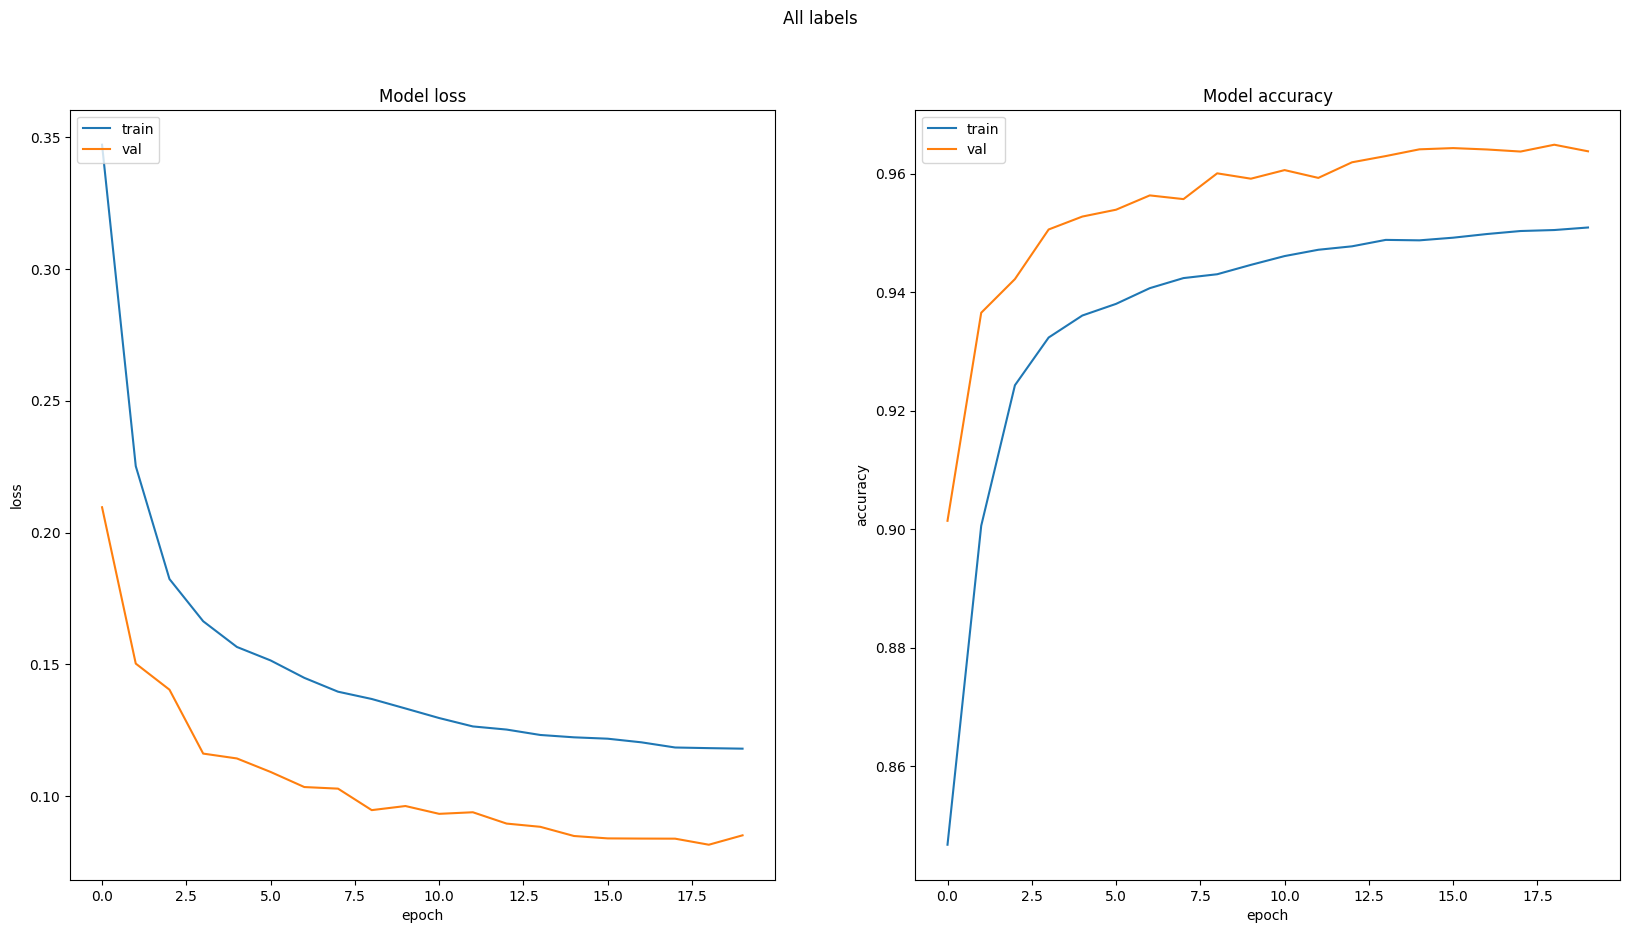

In [50]:
plt.figure(figsize=(20, 10)).suptitle("All labels")
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [51]:
model.save_weights(r'.\checkpoints\teeth\eegnet_teeth_20_features_v2.weights.h5')

In [52]:
y_pred = model.predict(test_x)
# y_pred.shape, np.argmax(y_pred, 2)[0], np.argmax(test_y[i], 1)
y_pred.shape

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(8981, 128, 2)

In [53]:
y_true = test_y
y_pred = np.argmax(y_pred, 2)
y_true.shape, y_pred.shape

((8981, 128), (8981, 128))

In [54]:
from sklearn.metrics import confusion_matrix

cm_total = np.zeros((2, 2))

for y_t, y_p in zip(y_true, y_pred):
    cm = confusion_matrix(y_t, y_p, labels=[0, 1])
    cm = np.array(cm)
    cm_total = cm_total + cm

cm_total


array([[938614.,  25362.],
       [ 16285., 169307.]])

In [55]:
result = []
for cls in range(2):
    tp = cm_total[cls, cls]
    fn = np.sum(np.delete(cm_total[cls, :], cls))
    fp = np.sum(np.delete(cm_total[:, cls], cls))
    tn = np.delete(cm_total, cls, axis=0)
    tn = np.sum(np.delete(tn, cls, axis=1))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    acc = (tp + tn) / (tp + fn + tn + fp)
    specifity = tn/(tn+fp)

    result.append([precision, recall, f1, acc, specifity])

print('precision, recall, f1, acc, specifity')
result = np.array(result)
result

precision, recall, f1, acc, specifity


array([[0.98294584, 0.97369022, 0.97829614, 0.96377161, 0.91225376],
       [0.86971732, 0.91225376, 0.89047786, 0.96377161, 0.97369022]])

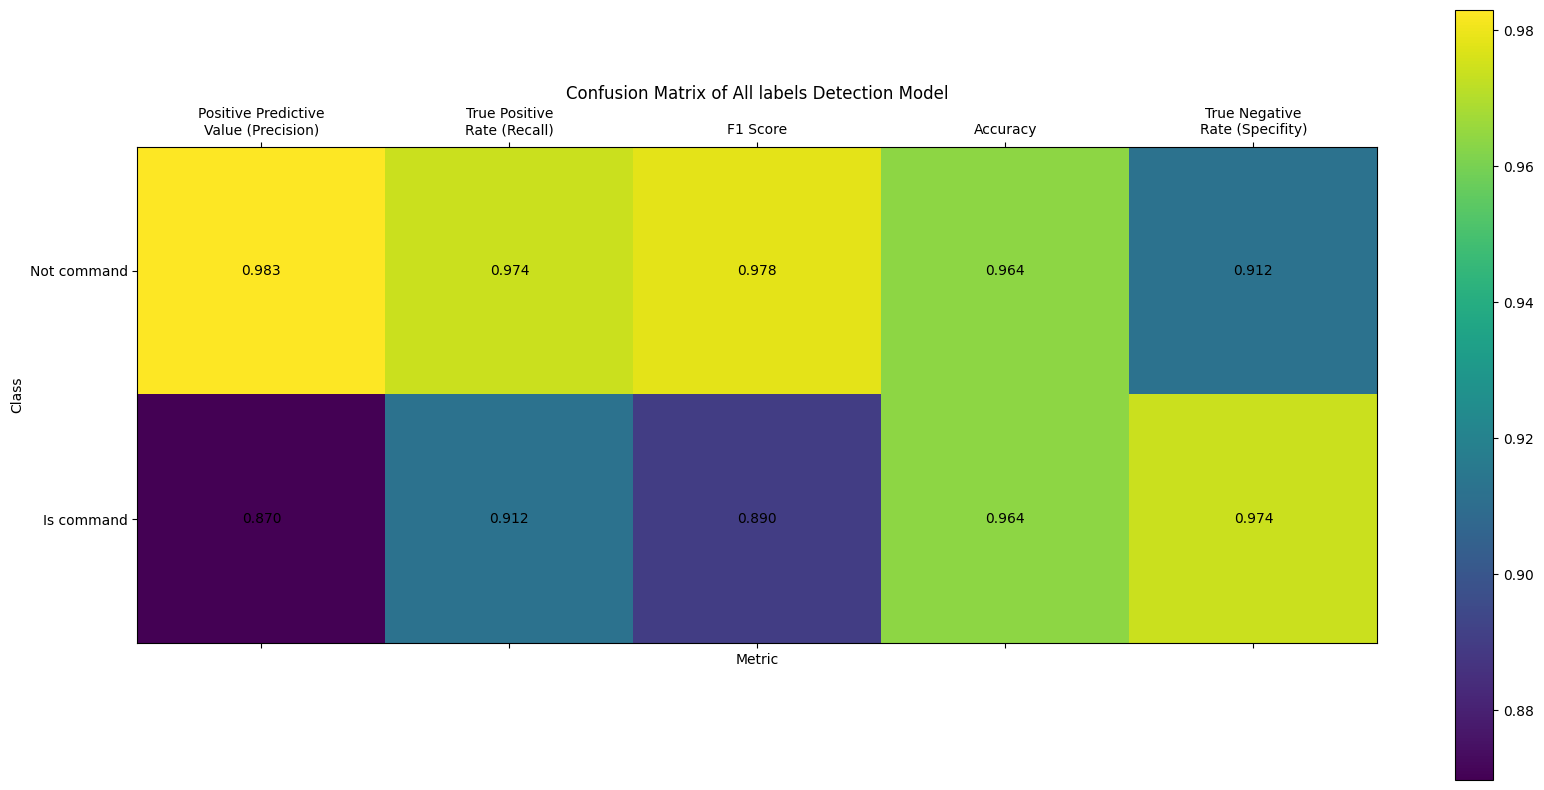

In [56]:
plt.figure(figsize=(20, 10))
plt.title("Confusion Matrix of All labels Detection Model")
plt.matshow(result, fignum=False)
plt.xticks([0, 1, 2, 3, 4], ['Positive Predictive\nValue (Precision)', 'True Positive\nRate (Recall)', 'F1 Score', 'Accuracy', 'True Negative\nRate (Specifity)'])
plt.yticks([0, 1], ['Not command', 'Is command'])
plt.xlabel("Metric")
plt.ylabel("Class")
for (i, j), z in np.ndenumerate(result):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
plt.colorbar()

In [57]:
y_pred = model.predict(test_x)
# y_pred.shape, np.argmax(y_pred, 2)[0], np.argmax(test_y[i], 1)
y_pred.shape

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(8981, 128, 2)

In [58]:
y_true_right = test_y.copy()
y_true_right[y_true_right == 2] = 0
y_pred_right = np.argmax(y_pred, 2)
y_true_right.shape, y_pred_right.shape

((8981, 128), (8981, 128))

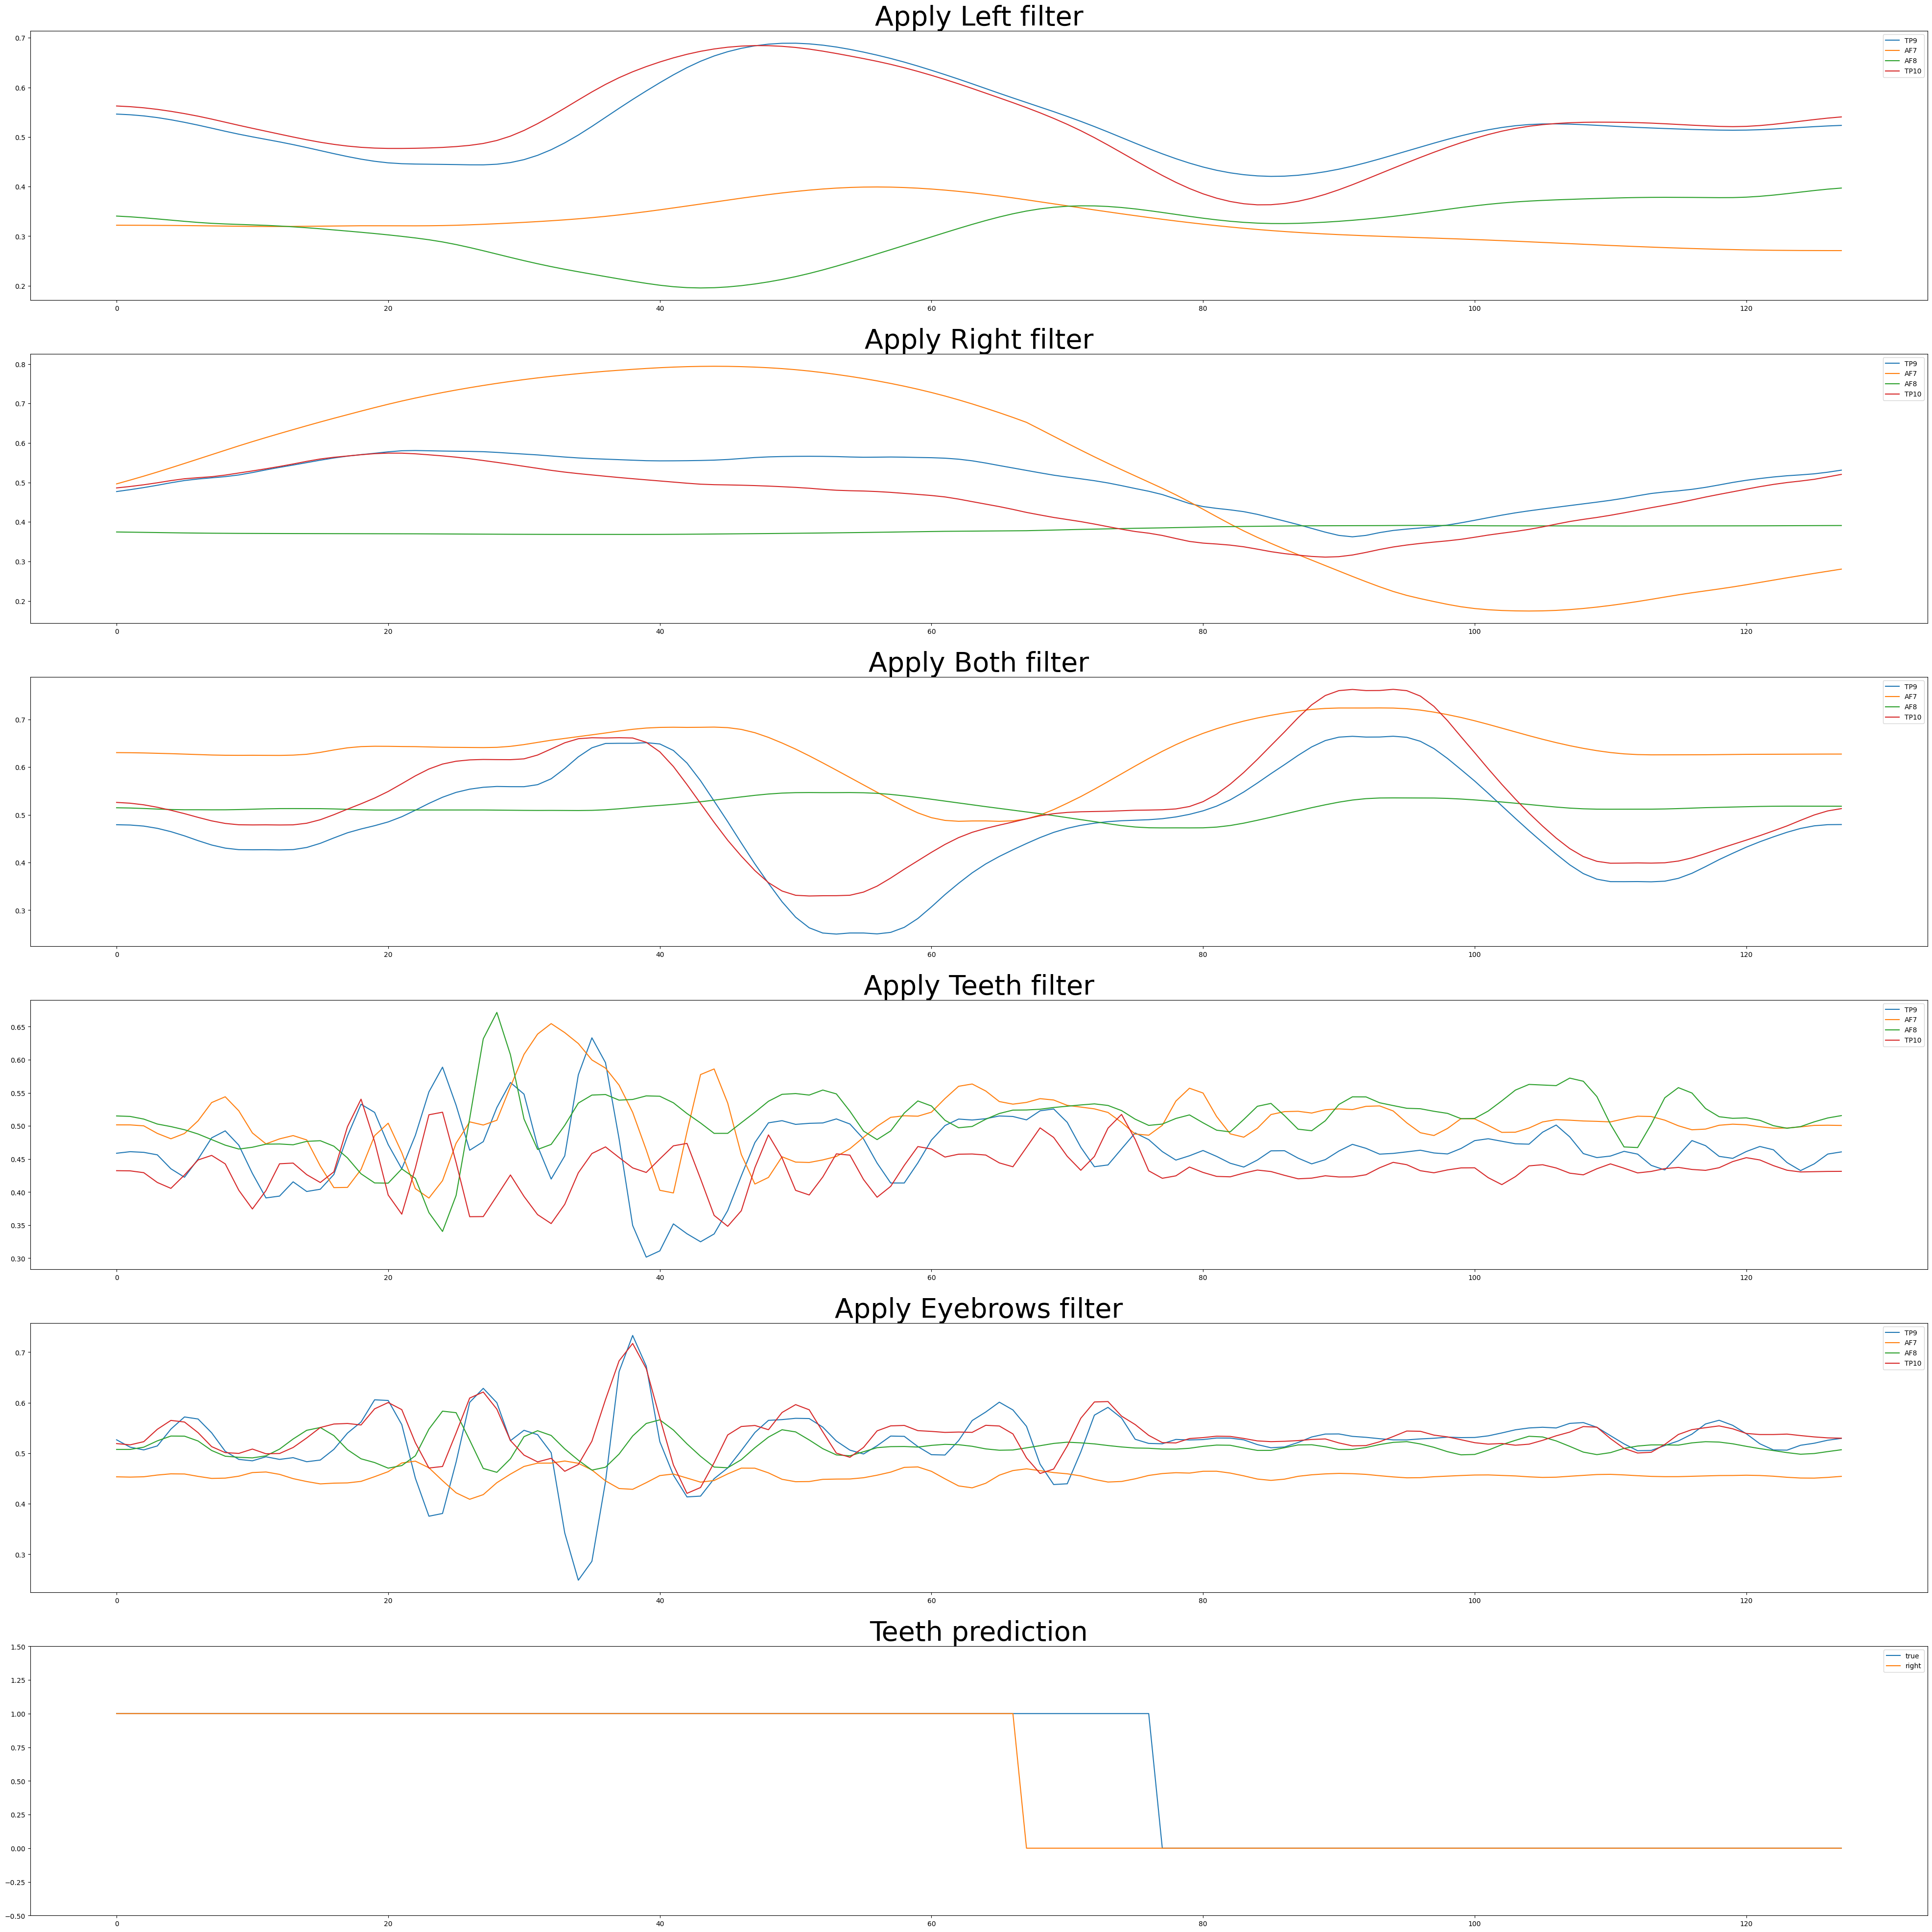

In [59]:
plt.figure(figsize=(50,50))
idx = np.random.randint(0, test_x.shape[0])

plt.subplot(6, 1, 1)
plt.title("Apply Left filter", fontsize=40)
plt.plot(test_x[idx].transpose(1, 0, 2).squeeze(2)[:, :4], label=['TP9', 'AF7', 'AF8', 'TP10'])
plt.legend()

plt.subplot(6, 1, 2)
plt.title("Apply Right filter", fontsize=40)
plt.plot(test_x[idx].transpose(1, 0, 2).squeeze(2)[:, 4:8], label=['TP9', 'AF7', 'AF8', 'TP10'])
plt.legend()

plt.subplot(6, 1, 3)
plt.title("Apply Both filter", fontsize=40)
plt.plot(test_x[idx].transpose(1, 0, 2).squeeze(2)[:, 8:12], label=['TP9', 'AF7', 'AF8', 'TP10'])
plt.legend()

plt.subplot(6, 1, 4)
plt.title("Apply Teeth filter", fontsize=40)
plt.plot(test_x[idx].transpose(1, 0, 2).squeeze(2)[:, 12:16], label=['TP9', 'AF7', 'AF8', 'TP10'])
plt.legend()

plt.subplot(6, 1, 5)
plt.title("Apply Eyebrows filter", fontsize=40)
plt.plot(test_x[idx].transpose(1, 0, 2).squeeze(2)[:, 16:20], label=['TP9', 'AF7', 'AF8', 'TP10'])
plt.legend()

plt.subplot(6, 1, 6)
plt.gca().set_ylim(-0.5, 1.5)
plt.title("Teeth prediction", fontsize=40)
plt.plot(y_true_right[idx], label='true')
plt.plot(y_pred_right[idx], label='right')
plt.legend()

plt.legend()
